## Gene Expression Counts
Looking at expression of various genes as potential HCR probes

In [2]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestCentroid
import json

In [3]:
# Load in pre-processed data from glutamatergic class designation, subclass to all rank_gene_groups already performed
gluData = sc.read("../Data/clData.h5ad")

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
# Specify genes to look at
geneList = ["Tnnt1", "Calb2", "Necab1", "Scn4b", "C1ql3", "Kirrel3", "Hs3st1", "Syndig1l", "Slc17a7"]

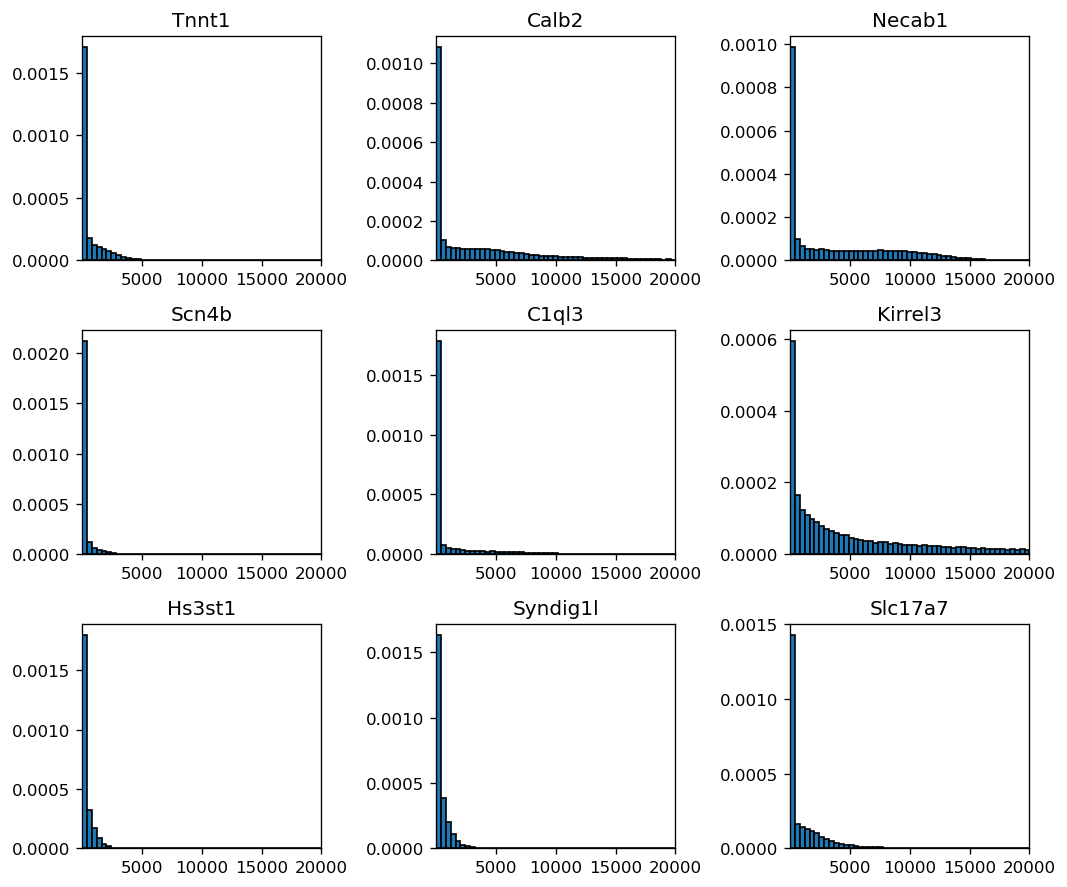

In [5]:
# Plot overall expression histograms for each gene
bins = np.linspace(0,20000,50)

nGenes = len(geneList)
nRows = int(np.sqrt(nGenes))
nCols = int(np.ceil(nGenes / nRows))

plt.figure(figsize=(nRows * 3, nCols * 2.5), dpi=120)
plt.subplot(nRows,nCols ,1)

# Plot histograms
for i, gene in enumerate(geneList):
    plt.subplot(nRows,nCols,i+1)
    x = gluData[:,gene].X.A
    y = 10 * ((2 ** x) - 1)
    plt.hist(y, bins, density=True,edgecolor='black',linewidth=1);
    plt.title(gene)
    plt.xlim(0.1,20000)
#     plt.ylim(0,1)
    plt.tight_layout()

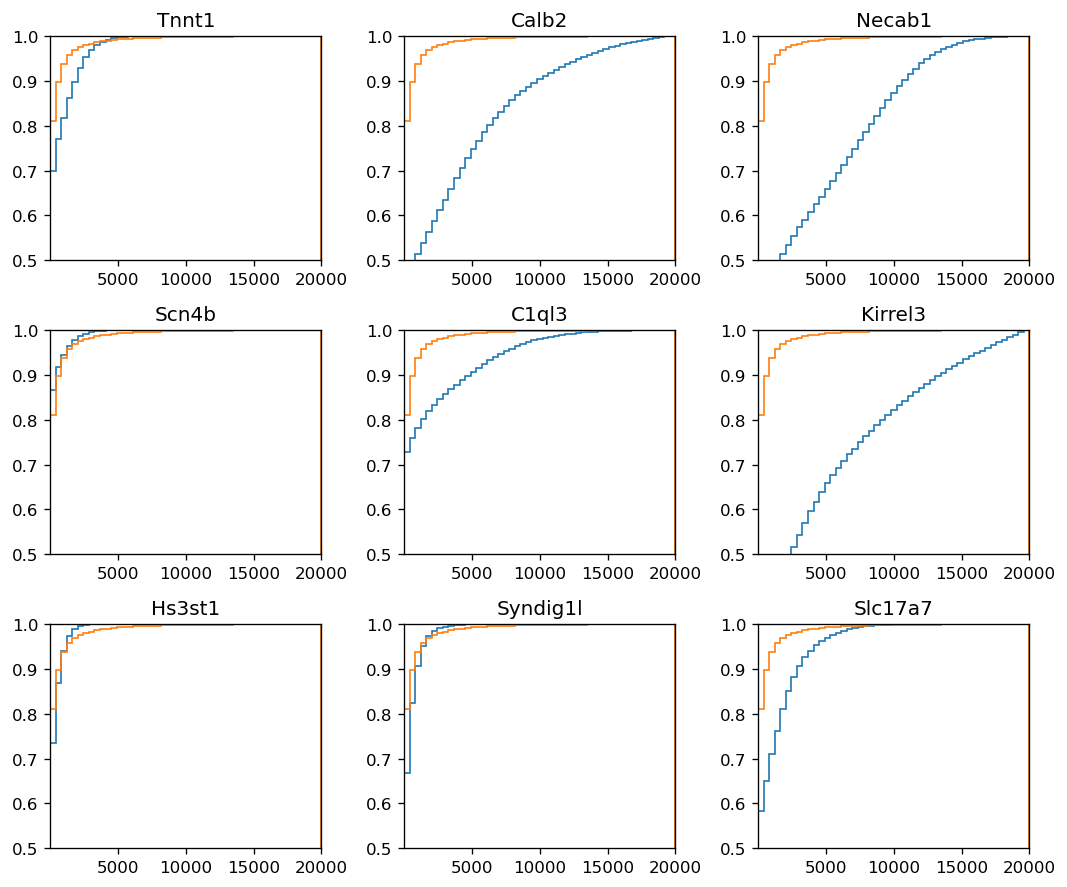

In [8]:
# Plot log2 expression histograms for randomly selected genes
from random import sample

allGenes = list(gluData.var_names)
genesRand = sample(allGenes,500)

x = gluData[:,genesRand].X.A
y = 10 * ((2 ** x) - 1)
nullData = y.reshape([y.shape[0] * y.shape[1],1])

nGenes = len(geneList)
nRows = int(np.sqrt(nGenes))
nCols = int(np.ceil(nGenes / nRows))

plt.figure(figsize=(nRows * 3, nCols * 2.5), dpi=120)
plt.subplot(nRows,nCols ,1)

# Plot histograms
for i, gene in enumerate(geneList):
    plt.subplot(nRows,nCols,i+1)
    x = gluData[:,gene].X.A
    y = 10 * ((2 ** x) - 1)
    plt.hist(y, bins, density=True,histtype='step', cumulative=True, linewidth = 1);
    plt.hist(nullData, bins, density = True, histtype='step', cumulative=True, linewidth = 1);
    plt.title(gene)
    plt.xlim(0.1,5)
    plt.xlim(0.1,20000)
    plt.ylim(.5,1)
    plt.tight_layout()

In [71]:
# KS Tests
from scipy.stats import ks_2samp

# Query particular genes
x = gluData[:,"Scn4b"].X.A
y = 10 * ((2 ** x) - 1)

ks_2samp(y.flatten(),nullData.flatten())

KstestResult(statistic=0.09833935081017908, pvalue=0.0)